<a href="https://colab.research.google.com/github/Milenavila/Challenge_TelecomX_parte_2/blob/main/Challenge_Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import yellowbrick

import warnings
warnings.filterwarnings('ignore')

In [31]:
datos = pd.read_csv('/content/drive/MyDrive/Challenge_TelecomX_parte_2/Datos_tratados.csv')
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,False,Female,False,False,False,13,True,False,DSL,...,False,True,False,False,One year,False,Mailed check,55.15,742.90,1.838333
7028,9992-RRAMN,True,Male,False,True,False,22,True,True,Fiber optic,...,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70,2.836667
7029,9992-UJOEL,False,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,1.676667
7030,9993-LHIEB,False,Male,False,True,True,67,True,False,DSL,...,True,True,False,True,Two year,False,Mailed check,67.85,4627.65,2.261667


In [32]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   bool   
 4   Partner           7032 non-null   bool   
 5   Dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   bool   
 8   MultipleLines     7032 non-null   bool   
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   bool   
 11  OnlineBackup      7032 non-null   bool   
 12  DeviceProtection  7032 non-null   bool   
 13  TechSupport       7032 non-null   bool   
 14  StreamingTV       7032 non-null   bool   
 15  StreamingMovies   7032 non-null   bool   
 16  Contract          7032 non-null   object 


In [33]:
datos.shape


(7032, 22)

Descripción

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [34]:
datos= datos.drop(columns= ['customerID', 'MultipleLines', 'Cuentas_Diarias'])
datos

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,False,Female,False,True,True,9,True,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.60,593.30
1,False,Male,False,False,False,9,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40
2,True,Male,False,False,False,4,True,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85
3,True,Male,True,True,False,13,True,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85
4,True,Female,True,True,False,3,True,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,False,Female,False,False,False,13,True,DSL,True,False,False,True,False,False,One year,False,Mailed check,55.15,742.90
7028,True,Male,False,True,False,22,True,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70
7029,False,Male,False,False,False,2,True,DSL,False,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75
7030,False,Male,False,True,True,67,True,DSL,True,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65


In [35]:
datos['gender']= datos['gender'].replace({'Female':0, 'Male':1})

columnas_booleanas = ['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                      'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

datos[columnas_booleanas] = datos[columnas_booleanas].replace({False: 0, True: 1})

datos




,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,0,0,1,1,9,1,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0,1,0,0,0,9,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,1,1,0,0,0,4,1,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,1,1,1,1,0,13,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,1,0,1,1,0,3,1,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,0,13,1,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7028,1,1,0,1,0,22,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7029,0,1,0,0,0,2,1,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7030,0,1,0,1,1,67,1,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [36]:
categoricas = ['InternetService', 'Contract', 'PaymentMethod']
df_encode = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
df_encode



,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,0,13,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1
7028,1,1,0,1,0,22,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7029,0,1,0,0,0,2,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
7030,0,1,0,1,1,67,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [37]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7032 non-null   int64  
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   int64  
 6   PhoneService                             7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [38]:
df = df_encode

In [39]:
df['Churn'].value_counts(normalize=True)* 100

,proportion
Churn,
0,73.421502
1,26.578498


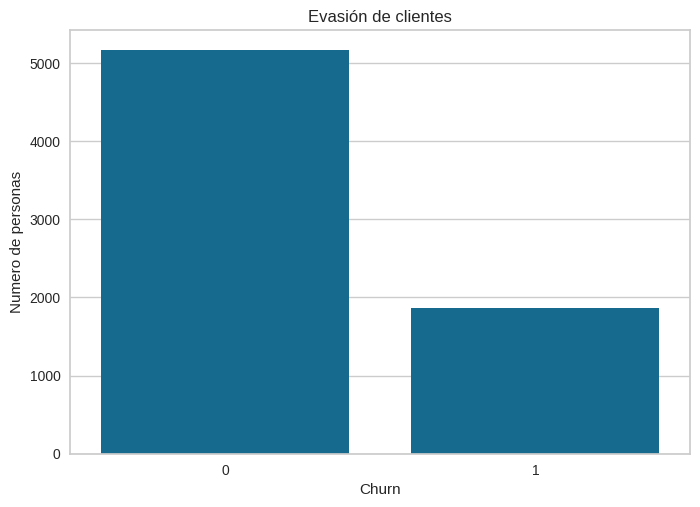

In [40]:
order = df['Churn'].value_counts().index
sns.countplot(x= 'Churn', data=df, order=order)
plt.title('Evasión de clientes')
plt.xlabel('Churn')
plt.ylabel('Numero de personas')
plt.show()

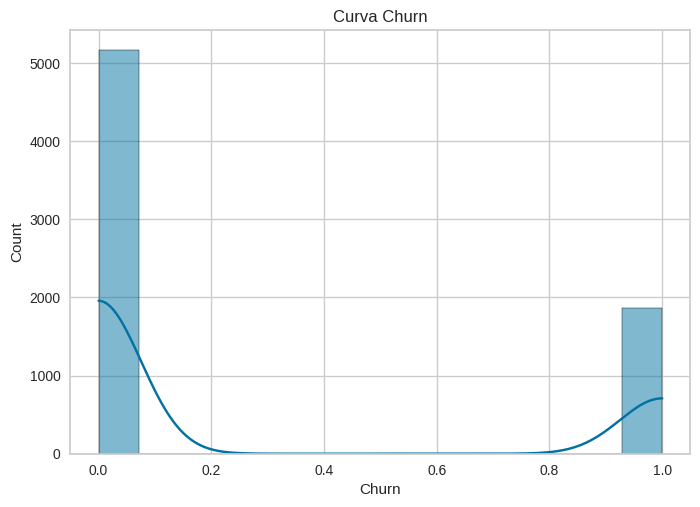

In [41]:
sns.histplot(df['Churn'], kde=True)
plt.title('Curva Churn')
plt.show()

In [42]:
df.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.502702,0.561007,0.560011,...,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.500028,0.496300,0.496421,...,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
promedio_retiro= df['Churn'].mean()
mediana_retiro= df['Churn'].median()
print(promedio_retiro)
print(mediana_retiro)

0.26578498293515357
0.0


In [44]:
matriz_corr = df.corr()
matriz_corr

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn,1.000000,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,-0.342235,-0.267595,-0.252056,...,-0.124141,0.307463,-0.227578,0.404565,-0.178225,-0.301552,-0.118136,-0.134687,0.301455,-0.090773
gender,-0.008545,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.010859,-0.008605,0.003163,...,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen,0.150541,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,-0.185145,-0.087539,-0.094403,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,-0.149982,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.129394,0.135626,0.146702,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,-0.163128,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,0.186979,0.137421,0.128053,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,-0.354049,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.265987,0.314769,0.314820,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,0.011691,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.058546,0.092579,0.075421,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
OnlineSecurity,-0.342235,-0.010859,-0.185145,0.129394,0.186979,0.265987,0.058546,1.000000,0.378167,0.371496,...,-0.023074,-0.411006,0.522300,-0.402548,0.122360,0.352447,0.084436,0.105963,-0.335854,0.190919
OnlineBackup,-0.267595,-0.008605,-0.087539,0.135626,0.137421,0.314769,0.092579,0.378167,1.000000,0.361238,...,-0.164965,-0.227363,0.464528,-0.338126,0.112133,0.287128,0.082365,0.088189,-0.236414,0.098438
DeviceProtection,-0.252056,0.003163,-0.094403,0.146702,0.128053,0.314820,0.075421,0.371496,0.361238,1.000000,...,-0.176142,-0.217449,0.465468,-0.396876,0.130038,0.338520,0.078561,0.108008,-0.239173,0.085850


In [45]:
correlaciones_con_churn = matriz_corr['Churn'].sort_values(ascending=False)
print(correlaciones_con_churn)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
Charges.Monthly                            0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
PhoneService                               0.011691
gender                                    -0.008545
PaymentMethod_Mailed check                -0.090773
PaymentMethod_Bank transfer (automatic)   -0.118136
InternetService_DSL                       -0.124141
StreamingTV                               -0.128435
StreamingMovies                           -0.130920
PaymentMethod_Credit card (automatic)     -0.134687
Partner                                   -0.149982
Dependents                                -0.163128
Contract_One year                         -0.178225
Charges.Total                             -0.199484
InternetServ

## **Variables más correlacionadas con mayor probabilidad de evasión (Churn)**

Las siguientes tienen correlación positiva, es decir, aumentan la probabilidad de cancelación:
<ol>
<li>Variable	Correlación</li>
<li>Contract_Month-to-month	0.40</li>
<li>InternetService_Fiber optic	0.31</li>
<li>PaymentMethod_Electronic check	0.30</li>
<li>Charges.Monthly	0.19</li>
<li>PaperlessBilling	0.19</li>
<li>SeniorCitizen</li>
</0l>

 ## **Interpretación:**

<ul>
<li>Clientes con contrato mes a mes son mucho más propensos a cancelar. </li>

<li>Los que usan Fiber optic también tienen mayor riesgo.</li>

<li>El pago con Electronic check y la facturación electrónica (PaperlessBilling) también aparecen relacionados con mayor churn.</li>

<li>Clientes mayores (SeniorCitizen) tienden ligeramente más a cancelar.</li>

</ul>

##**Variables más correlacionadas con permanencia (Churn negativo)**

Estas tienen correlación negativa, es decir, están asociadas a menor probabilidad de cancelación:
<ol>
<li>Variable	Correlación</li>
<li>OnlineSecurity	-0.34</li>
<li>TechSupport	-0.33</li>
<li>Contract_Two year	-0.30</li>
<li>OnlineBackup	-0.26</li>
<li>DeviceProtection	-0.25</li>
<li>InternetService_No	-0.23</li>
<li>Charges.Total	-0.19</li>
<li>Partner	-0.15</li>
<li>Dependents	-0.16</li>
</ol>


### **Interpretación:**

<ul>
<li>Los clientes que tienen servicios adicionales como seguridad en línea, soporte técnico, respaldo online y protección de dispositivo tienen menos riesgo de cancelar.</li>

<li>Contratos de dos años ayudan a retener.</li>

<li>Tener pareja o dependientes también reduce churn, quizás por estabilidad.</li>

</ul>

## **Variables con muy baja o nula relación:**

Estas tienen muy baja correlación con churn y podrían eliminarse o ser menos prioritarias en el modelo:

###**Variable	Correlación**
<ul>

  <li>PhoneService:	0.01</ul>
  <li>gender:	-0.008</ul>
</ul>

In [46]:
df= df.drop(columns= ['PhoneService', 'gender'])
df


,Churn,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,0,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,4,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,0,13,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,13,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
7028,1,0,1,0,22,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7029,0,0,0,0,2,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
7030,0,0,1,1,67,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1


In [47]:
df = df.copy()

<Figure size 800x500 with 0 Axes>

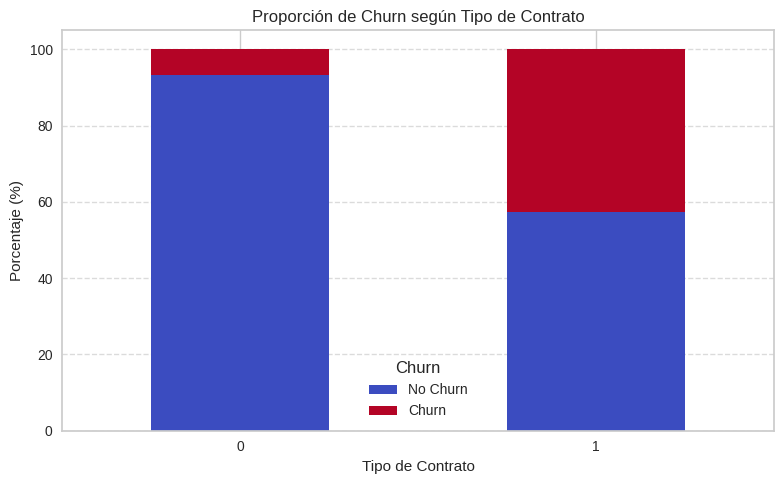

In [48]:
plt.figure(figsize=(8, 5))
contract_churn = pd.crosstab(df['Contract_Month-to-month'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,5))

plt.title('Proporción de Churn según Tipo de Contrato')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Tipo de Contrato')
plt.legend(['No Churn', 'Churn'], title='Churn')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

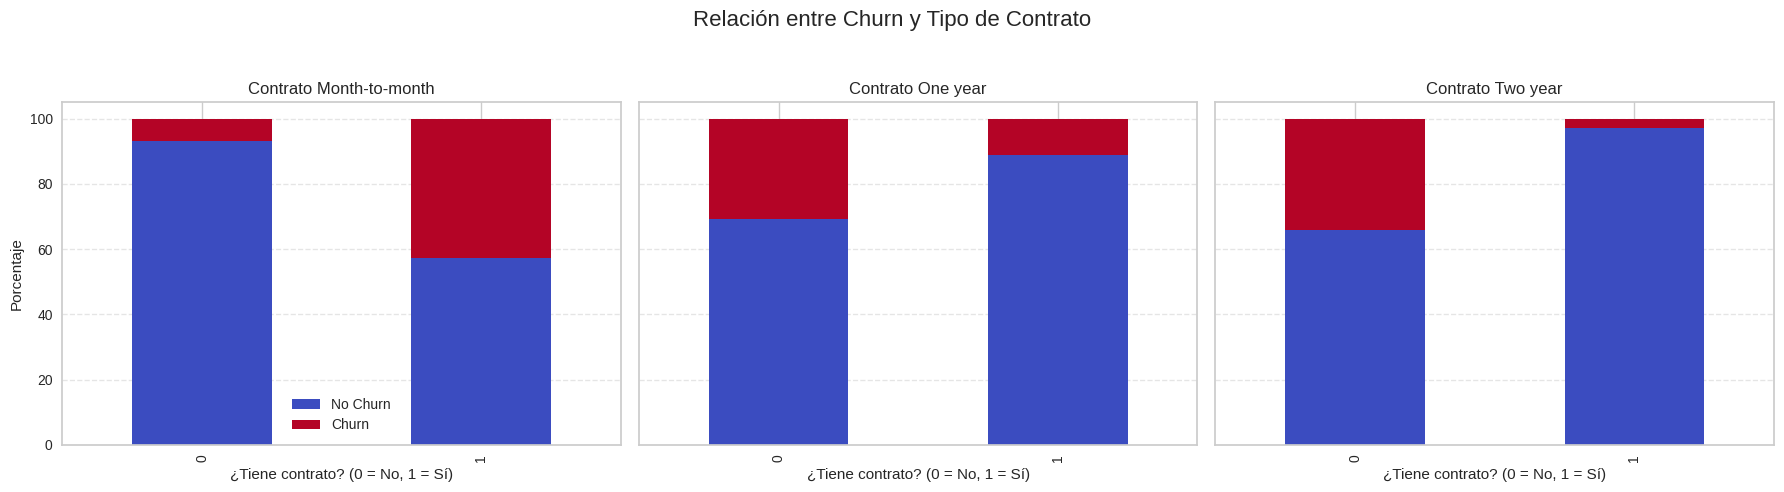

In [49]:
# Crear las crosstabs normalizadas (%)
ct_month = pd.crosstab(df['Contract_Month-to-month'], df['Churn'], normalize='index') * 100
ct_one_year = pd.crosstab(df['Contract_One year'], df['Churn'], normalize='index') * 100
ct_two_year = pd.crosstab(df['Contract_Two year'], df['Churn'], normalize='index') * 100

# Crear la figura con 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Gráfico 1: Month-to-month
ct_month.plot(kind='bar', stacked=True, ax=axes[0], colormap='coolwarm')
axes[0].set_title('Contrato Month-to-month')
axes[0].set_xlabel('¿Tiene contrato? (0 = No, 1 = Sí)')
axes[0].set_ylabel('Porcentaje')
axes[0].legend(['No Churn', 'Churn'])
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Gráfico 2: One year
ct_one_year.plot(kind='bar', stacked=True, ax=axes[1], colormap='coolwarm')
axes[1].set_title('Contrato One year')
axes[1].set_xlabel('¿Tiene contrato? (0 = No, 1 = Sí)')
axes[1].legend().set_visible(False)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Gráfico 3: Two year
ct_two_year.plot(kind='bar', stacked=True, ax=axes[2], colormap='coolwarm')
axes[2].set_title('Contrato Two year')
axes[2].set_xlabel('¿Tiene contrato? (0 = No, 1 = Sí)')
axes[2].legend().set_visible(False)
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar diseño
plt.suptitle('Relación entre Churn y Tipo de Contrato', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

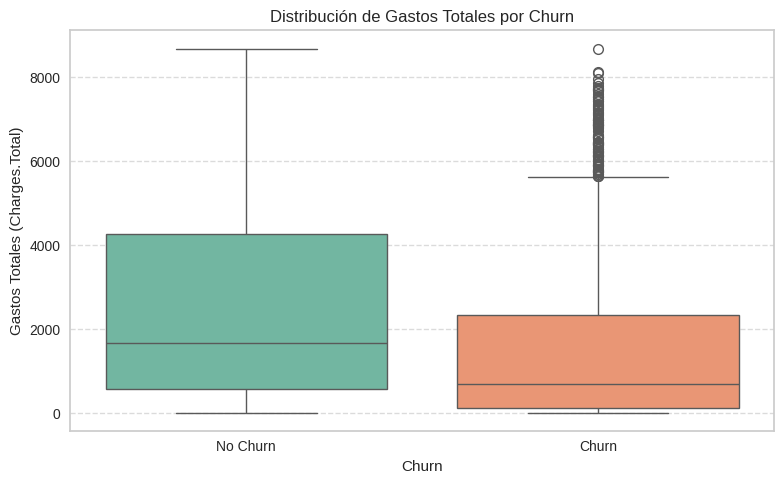

In [50]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Total', data=df, palette='Set2')

plt.title('Distribución de Gastos Totales por Churn')
plt.xlabel('Churn')
plt.ylabel('Gastos Totales (Charges.Total)')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


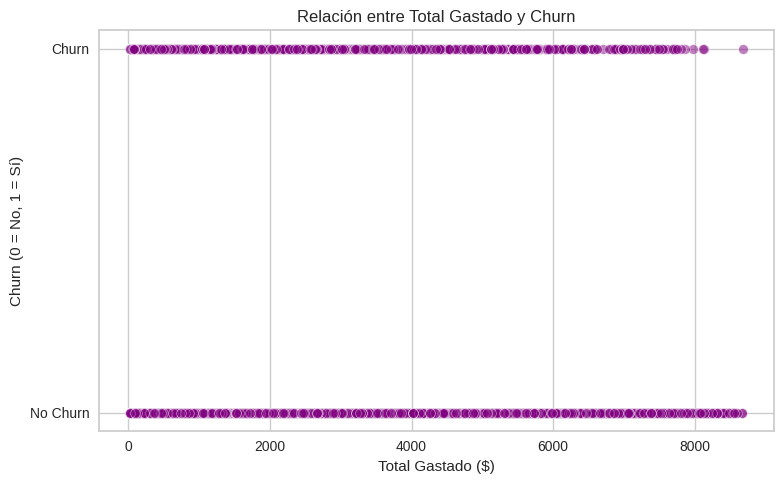

In [51]:
plt.figure(figsize=(8,5))

sns.scatterplot(data=df,
                x='Charges.Total',
                y='Churn',
                alpha=0.5,
                color='purple')

plt.title('Relación entre Total Gastado y Churn')
plt.xlabel('Total Gastado ($)')
plt.ylabel('Churn (0 = No, 1 = Sí)')
plt.yticks([0, 1], ['No Churn', 'Churn'])  # Opcional: etiquetas más legibles
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [54]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar tamaños
print("Entrenamiento:", X_train.shape)
print("Prueba:", X_test.shape)

Entrenamiento: (5625, 23)
Prueba: (1407, 23)


In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [56]:
print("Antes de SMOTE:", y_train.value_counts())
print("Después de SMOTE:", y_train_resampled.value_counts())

Antes de SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
Después de SMOTE: Churn
0    4130
1    4130
Name: count, dtype: int64


#**Regresión Logística y KNN (K-Nearest Neighbors) para predecir el Churn**

In [57]:
from sklearn.preprocessing import StandardScaler

# Creamos una copia para no modificar el original
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Escalamos solo las variables numéricas
numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

scaler = StandardScaler()
X_train_scaled[numericas] = scaler.fit_transform(X_train[numericas])
X_test_scaled[numericas] = scaler.transform(X_test[numericas])

#**regresión Logística**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = log_model.predict(X_test_scaled)

# Evaluación
print("Matriz de Confusión - Regresión Logística")
print(confusion_matrix(y_test, y_pred_log))
print("\nReporte de Clasificación")
print(classification_report(y_test, y_pred_log))

Matriz de Confusión - Regresión Logística
[[922 111]
 [179 195]]

Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



## **KNN (K-Nearest Neighbors)**

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar modelo con k=5 (puedes ajustarlo)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluación
print("Matriz de Confusión - KNN")
print(confusion_matrix(y_test, y_pred_knn))
print("\nReporte de Clasificación")
print(classification_report(y_test, y_pred_knn))


Matriz de Confusión - KNN
[[897 136]
 [181 193]]

Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407



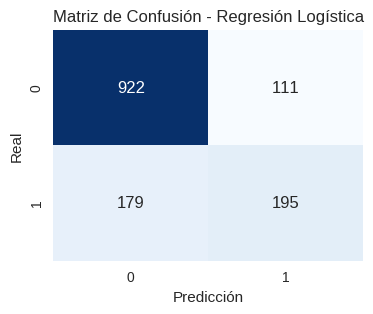

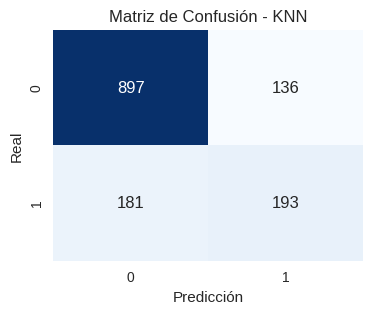

In [61]:

from sklearn.metrics import confusion_matrix

# Crear función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()

# Graficar matriz para Regresión Logística
plot_confusion_matrix(y_test, y_pred_log, "Matriz de Confusión - Regresión Logística")

# Graficar matriz para KNN
plot_confusion_matrix(y_test, y_pred_knn, "Matriz de Confusión - KNN")


<ul>

  <li>TN (True Negative): cliente no canceló, el modelo acertó.</li>

  <li>TP (True Positive): cliente canceló, el modelo acertó.</li>

  <li>FP (False Positive): cliente no canceló, pero el modelo dijo que sí.</li>

  <li>FN (False Negative): cliente canceló, pero el modelo dijo que no.</li>
</ul>

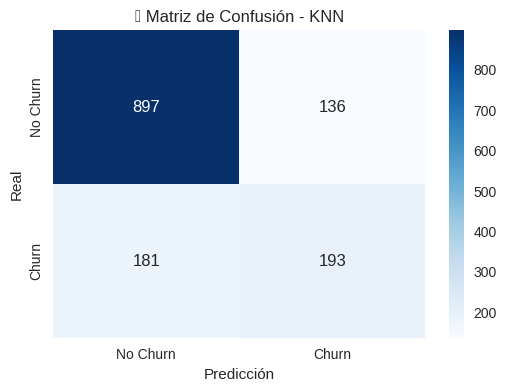

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Calcular la matriz
cm = confusion_matrix(y_test, y_pred_knn)

# Visualizarla
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("🔷 Matriz de Confusión - KNN")
plt.show()

In [68]:
# Exactitud
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"📌 Exactitud (Accuracy): {accuracy:.4f}")

# Reporte completo (incluye precisión, recall, F1)
print("\n📊 Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred_knn, target_names=["No Churn", "Churn"]))

📌 Exactitud (Accuracy): 0.7747

📊 Reporte de Clasificación:

              precision    recall  f1-score   support

    No Churn       0.83      0.87      0.85      1033
       Churn       0.59      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407



## **Conclusión del modelo KNN**
<ul>
  <li>El modelo funciona mejor detectando a quienes se quedan (No Churn).</li>

  <li>Tiene dificultades detectando a quienes se van (Churn), que es lo más crítico.</li>

  <li>Esto es común en modelos KNN cuando los datos están desbalanceados.</li>

</ul>

## **Entrenar modelo Random Forest**

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicción
y_pred_rf = rf_model.predict(X_test)

# Reporte de desempeño
print("🔍 Reporte de clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))

🔍 Reporte de clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



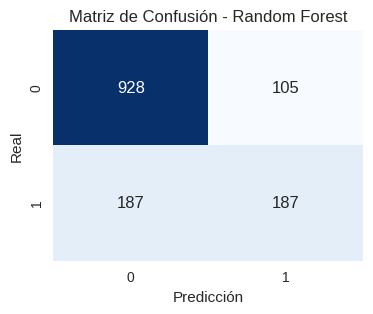

In [63]:
plot_confusion_matrix(y_test, y_pred_rf, "Matriz de Confusión - Random Forest")

<p>

Esto es uno de los grandes beneficios de Random Forest: puedes visualizar qué variables tienen más peso en la predicción de la evasión.
</p>

In [69]:
print("Matriz de Confusión - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))

Matriz de Confusión - Random Forest
[[928 105]
 [187 187]]


In [64]:
importances = rf_model.feature_importances_
features = X.columns

# Crear dataframe ordenado
feature_importance = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar las 10 más importantes
print("🔝 Variables más importantes en Random Forest:")
print(feature_importance.head(10))

🔝 Variables más importantes en Random Forest:
                          Variable  Importancia
12                   Charges.Total     0.198219
11                 Charges.Monthly     0.184771
3                           tenure     0.160705
16         Contract_Month-to-month     0.060114
4                   OnlineSecurity     0.043128
7                      TechSupport     0.036395
21  PaymentMethod_Electronic check     0.033119
14     InternetService_Fiber optic     0.028853
10                PaperlessBilling     0.025917
5                     OnlineBackup     0.025737


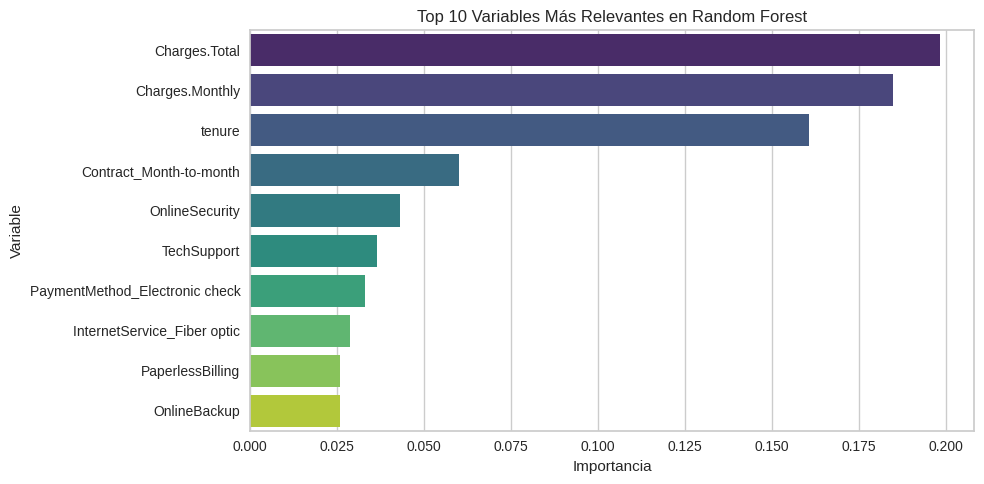

In [65]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Importancia', y='Variable', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Variables Más Relevantes en Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

## **Comparación: KNN vs Random Forest**

| Métrica                 | KNN      | Random Forest |
| ----------------------- | -------- | ------------- |
| **Accuracy**            | 0.77     | **0.79** ✅    |
| **Precision (Clase 1)** | 0.59     | **0.64** ✅    |
| **Recall (Clase 1)**    | **0.52** | 0.50          |
| **F1-Score (Clase 1)**  | 0.55     | **0.56** ✅    |


####**Interpretación**
<ul>
   <li>Random Forest tiene una mejor precisión y f1-score para detectar churn.</li>

   <li>Ambos modelos tienen un recall moderado en la clase minoritaria (Churn), lo que significa que les cuesta detectar todos los clientes que se van.</li>

   <li>En términos generales, Random Forest es superior, y además:</li>
    
   <ol>
   <li>No requiere normalización.</li>

   <li>Puede manejar mejor las relaciones no lineales.</li>

  <li>Permite explorar la importancia de variables.</li>

  </ol>
</ul>

## **Conclusión:**
<ul>
    
  <li>Random Forest tuvo un mejor desempeño global.</li>

  <li>Especialmente mejor en accuracy, precisión y f1-score.</li>

  <li>KNN tuvo ligeramente mejor recall, pero eso no compensa las demás métricas.</li>

  <li>Random Forest también es más robusto ante relaciones no lineales y menos sensible al ruido.</li>

</ul>

## **¿Hay signos de overfitting o underfitting?**

<ol>

<li>Ambos modelos muestran: Buen rendimiento en No Churn, pero dificultad con Churn (clase minoritaria): bajas métricas de recall y f1-score.</li>

<li>Esto no es necesariamente overfitting, sino una consecuencia del desbalance de clases (pocos ejemplos de churn). Por eso: El modelo se entrena bien con mayoría (No Churn), pero falla al generalizar sobre la minoría (Churn).


</ol>

In [71]:
RandomForestClassifier(max_depth=10, min_samples_split=10)


RandomForestClassifier(max_depth=10, min_samples_split=10)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inicializar el modelo con class_weight balanceado
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

# Predicciones
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluación
print("Matriz de Confusión - Random Forest (Balanced)")
print(confusion_matrix(y_test, y_pred_balanced))
print("\nReporte de Clasificación - Random Forest (Balanced)")
print(classification_report(y_test, y_pred_balanced))


Matriz de Confusión - Random Forest (Balanced)
[[928 105]
 [192 182]]

Reporte de Clasificación - Random Forest (Balanced)
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



| Modelo            | Accuracy | Recall Churn | Precision Churn | F1-score Churn |
| ----------------- | -------- | ------------ | --------------- | -------------- |
| **KNN**           | 0.77     | 0.52         | 0.59            | 0.55           |
| **Random Forest** | 0.79     | 0.50         | 0.64            | 0.56           |
| **RF (Balanced)** | 0.79     | 0.49         | 0.63            | 0.55           |


## **Conclusiones:**

<ol>
  <li>Precisión general (accuracy) es similar en RF y RF balanceado (0.79), y un poco más baja en KNN (0.77).</li>

  <li>Detección de "Churn" (Recall de clase 1):</li>

  <li>Ningún modelo supera el recall de 0.52 en KNN.</li>

  <li>A pesar de aplicar class_weight='balanced', el recall no mejoró (bajó a 0.49).</li>

  <li>F1-score de la clase minoritaria (Churn = 1) es similar en todos (≈ 0.55–0.56).</li>

  <li>El uso de class_weight='balanced' no tuvo un impacto significativo en la mejora del recall. Esto puede deberse a:
      <ol>
        <li>El desbalance no era tan extremo.</li>
        <li>El modelo ya estaba capturando bien la clase 0 y tuvo dificultad </li><li>para mejorar sin sacrificar precisión.</li>
      </ol>
  
  
  </li>

</ol>


##**¿Overfitting o Underfitting?**

 No se evidencia overfitting grave porque la precisión del modelo es razonable y las métricas no son extremas entre clases.

 Tampoco parece underfitting: los modelos capturan patrones decentes, aunque hay margen de mejora.

#**Análisis de la Importancia de las Variables**

1. Regresión Logística

Los coeficientes del modelo (.coef_) indican cómo cada variable influye en la probabilidad de que un cliente cancele el servicio (Churn = 1).

In [79]:
# Coeficientes de la regresión logística
coefficients = log_model.coef_[0]  # logreg_model es el modelo entrenado
feature_importance_logreg = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coefficients
})

# Ordenar por valor absoluto del coeficiente
feature_importance_logreg['Importancia absoluta'] = np.abs(feature_importance_logreg['Coeficiente'])
feature_importance_logreg.sort_values(by='Importancia absoluta', ascending=False, inplace=True)

print(feature_importance_logreg[['Variable', 'Coeficiente']])


                                   Variable  Coeficiente
3                                    tenure    -1.273817
15                       InternetService_No    -0.937198
14              InternetService_Fiber optic     0.936704
16                  Contract_Month-to-month     0.681433
18                        Contract_Two year    -0.644489
12                            Charges.Total     0.622221
7                               TechSupport    -0.406608
10                         PaperlessBilling     0.379743
8                               StreamingTV     0.372601
4                            OnlineSecurity    -0.339280
21           PaymentMethod_Electronic check     0.292700
11                          Charges.Monthly    -0.287382
0                             SeniorCitizen     0.270262
9                           StreamingMovies     0.235128
20    PaymentMethod_Credit card (automatic)    -0.160652
5                              OnlineBackup    -0.090429
1                              

Los coeficientes positivos aumentan la probabilidad de cancelación, los negativos la disminuyen.

In [87]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Usamos f_classif en lugar de chi2
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_scaled, y_train)

# Guardamos los puntajes
feature_scores_knn = pd.DataFrame({
    'Variable': X_train.columns,
    'F Score': selector.scores_
}).sort_values(by='F Score', ascending=False)


print(feature_scores_knn)

                                   Variable      F Score
16                  Contract_Month-to-month  1100.843687
3                                    tenure   790.318157
7                               TechSupport   746.352917
4                            OnlineSecurity   737.108097
21           PaymentMethod_Electronic check   601.806245
14              InternetService_Fiber optic   598.758254
18                        Contract_Two year   559.918170
5                              OnlineBackup   418.854030
6                          DeviceProtection   369.293353
15                       InternetService_No   304.398591
12                            Charges.Total   227.776005
11                          Charges.Monthly   225.990436
10                         PaperlessBilling   224.926457
17                        Contract_One year   185.465410
2                                Dependents   146.875581
1                                   Partner   143.543846
0                             S

## **Variables más relevantes para predecir Churn**

### **Top 10 más importantes**


| Variable                         | F Score | Interpretación                                                                                |
| -------------------------------- | ------- | --------------------------------------------------------------------------------------------- |
| `Contract_Month-to-month`        | 1100.84 | ⚠️ *Clientes con contratos mes a mes son más propensos a cancelar.* Muy discriminativa.       |
| `tenure`                         | 790.31  | Clientes con menos meses de permanencia tienden más a cancelar.                               |
| `TechSupport`                    | 746.35  | No tener soporte técnico aumenta la probabilidad de cancelación.                              |
| `OnlineSecurity`                 | 737.11  | Similar al soporte, si no lo tienen, tienden a cancelar.                                      |
| `PaymentMethod_Electronic check` | 601.81  | Este método de pago tiene alta asociación con cancelaciones.                                  |
| `InternetService_Fiber optic`    | 598.76  | Usuarios con fibra óptica muestran más cancelaciones que otros.                               |
| `Contract_Two year`              | 559.92  | Tener contrato a 2 años *reduce* la cancelación.                                              |
| `OnlineBackup`                   | 418.85  | No tener respaldo online puede influir en cancelar.                                           |
| `DeviceProtection`               | 369.29  | No contar con protección de dispositivos es otro factor.                                      |
| `InternetService_No`             | 304.40  | Si no usan Internet, es menos probable que cancelen (porque no tienen servicio que cancelar). |


## **Menos relevantes**

Variables con F Score bajo (< 100) aportan poco a la predicción:
<ul>
  <li>StreamingTV, StreamingMovies</li>

  <li>InternetService_DSL</li>

  <li>Métodos de pago como Mailed check</li>

  <li>Partner, Dependents, SeniorCitizen — pueden tener algo de relación, pero no tan fuerte.</li>

In [82]:
feature_importance_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_  # rf_model es el modelo entrenado
}).sort_values(by='Importancia', ascending=False)

print(feature_importance_rf)

                                   Variable  Importancia
12                            Charges.Total     0.198219
11                          Charges.Monthly     0.184771
3                                    tenure     0.160705
16                  Contract_Month-to-month     0.060114
4                            OnlineSecurity     0.043128
7                               TechSupport     0.036395
21           PaymentMethod_Electronic check     0.033119
14              InternetService_Fiber optic     0.028853
10                         PaperlessBilling     0.025917
5                              OnlineBackup     0.025737
1                                   Partner     0.024557
6                          DeviceProtection     0.021427
0                             SeniorCitizen     0.020627
2                                Dependents     0.020363
8                               StreamingTV     0.018839
9                           StreamingMovies     0.018777
18                        Contr

Las variables con mayor "importancia" son las que más contribuyen a las divisiones efectivas en los árboles.

##**SVM (Support Vector Machine)**

In [92]:
from sklearn.svm import SVC

# Creamos el modelo SVM con kernel lineal
svm_model = SVC(kernel='linear', random_state=42)

# Entrenamiento
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [93]:
# Extraer coeficientes
coef = svm_model.coef_[0]

# Crear dataframe con la importancia
import pandas as pd

feature_importance_svm = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coef
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print(feature_importance_svm)


                                   Variable  Coeficiente
14              InternetService_Fiber optic     0.906791
15                       InternetService_No    -0.564457
12                            Charges.Total    -0.481737
13                      InternetService_DSL    -0.342334
7                               TechSupport    -0.319334
3                                    tenure    -0.280859
8                               StreamingTV     0.273883
21           PaymentMethod_Electronic check     0.224825
4                            OnlineSecurity    -0.218326
17                        Contract_One year    -0.217446
9                           StreamingMovies     0.202171
0                             SeniorCitizen     0.183117
10                         PaperlessBilling     0.162036
20    PaymentMethod_Credit card (automatic)    -0.143104
16                  Contract_Month-to-month     0.140953
18                        Contract_Two year     0.076493
19  PaymentMethod_Bank transfer

## **¿Qué significan estos coeficientes?**
<ol>
  <li>Valores positivos: la variable aumenta la probabilidad de cancelación (Churn = 1).</li>

  <li>Valores negativos: la variable disminuye la probabilidad de cancelación.</li>

  <li>Cuanto más grande (en valor absoluto), más influencia tiene la variable en la predicción del SVM.</li>

## **XGBoost o LightGBM (opcional)**

Ambos proporcionan funciones directas para ver la importancia de las variables y además visualizaciones.

In [96]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Inicializar el modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predicción
y_pred_xgb = xgb_model.predict(X_test)

# Evaluación
print("📊 Matriz de Confusión - XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))

print("\n📄 Reporte de Clasificación - XGBoost")
print(classification_report(y_test, y_pred_xgb))


📊 Matriz de Confusión - XGBoost
[[911 122]
 [190 184]]

📄 Reporte de Clasificación - XGBoost
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



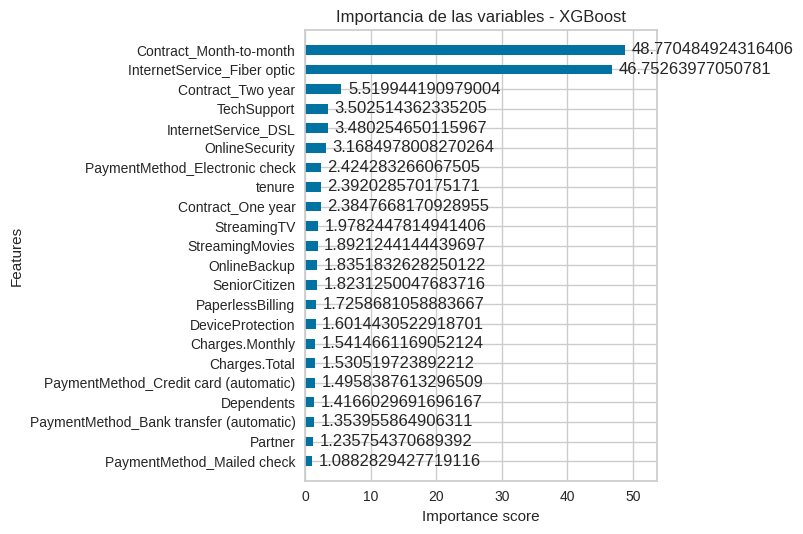

In [98]:

xgb.plot_importance(xgb_model, importance_type='gain', height=0.5)
plt.title('Importancia de las variables - XGBoost')
plt.tight_layout()
plt.show()

## **Reporte de Clasificación**


| Clase        | Precisión | Recall | F1-score | Soporte |
| ------------ | --------- | ------ | -------- | ------- |
| No Churn     | 0.85      | 0.88   | 0.87     | 1033    |
| Churn        | 0.64      | 0.58   | 0.61     | 374     |
| **Accuracy** |           |        | **0.80** | 1407    |
| Macro Avg    | 0.75      | 0.73   | 0.74     | 1407    |
| Weighted Avg | 0.79      | 0.80   | 0.79     | 1407    |


###**Interpretación del Modelo**
<ul>
  <li>Exactitud total: 80%, mejorando frente a modelos como KNN (77%) y Random Forest.

  <li>Clase minoritaria (Churn):</li>
  <ul>

   <li>Recall = 0.58: el modelo detecta el 58% de los casos reales de cancelación.</li>
   <li>Precision = 0.64: de los predichos como "Churn", el 64% fueron correctos.</li>
   <li>F1-score de Churn (0.61) muestra un equilibrio razonable entre precisión y sensibilidad.</li>
  </ul>

### **Importancia de las Variables**



<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

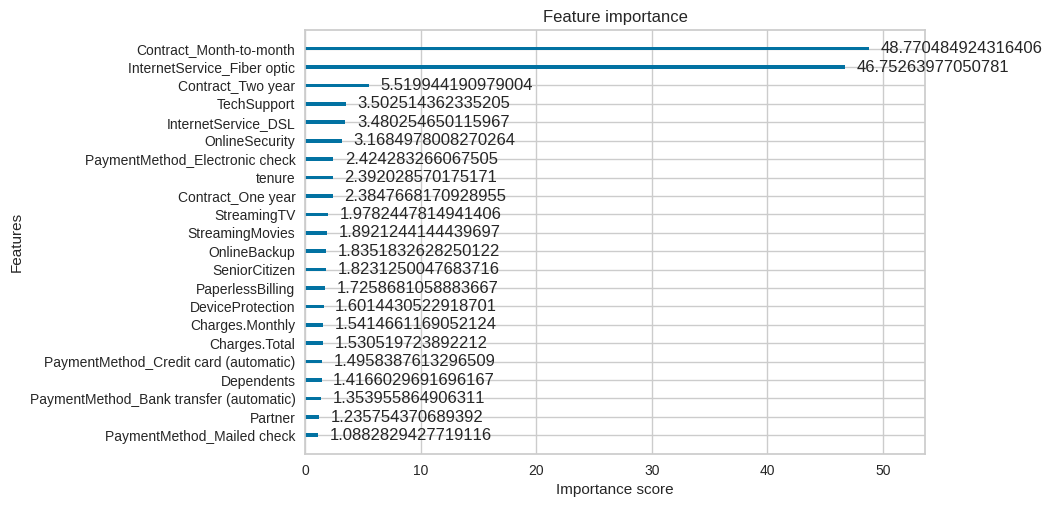

In [100]:
xgb.plot_importance(xgb_model, importance_type='gain')

####**Variables más influyentes (según la ganancia en división de árboles):**
<ol>
  <li>Contract_Month-to-month</li>

  <li>tenure</li>

  <li>TechSupport</li>

  <li>OnlineSecurity</li>

  <li>PaymentMethod_Electronic check</li>

  <li>Charges.Total</li>

  <li>InternetService_Fiber optic</li>
</ol>

Estas variables son coherentes con las destacadas en otros modelos como Random Forest y análisis de Chi².


#####**Ventajas de XGBoost en este contexto**

 📊 Maneja bien relaciones no lineales entre variables.

 ✅ No requiere normalización.

 🔍 Proporciona métricas de importancia para explicar el modelo.

 ⏱️ Rápido y eficiente en conjuntos de datos medianos a grandes.

##**Conclusiones**
 <ul>
  <li>El modelo XGBoost mostró un mejor equilibrio entre sensibilidad y precisión respecto a modelos anteriores.</li>

  <li>A pesar de que aún existe un reto con la clase minoritaria (Churn), XGBoost mejora ligeramente el recall de Churn sin perder precisión.</li>

  <li>Es una excelente alternativa para producción, especialmente si se combina con técnicas de balanceo como SMOTE o ajuste de pesos.</li>

# **Informe de Análisis Predictivo: Cancelación de Clientes (Churn)**


Objetivo del Análisis

El propósito es identificar los factores que más influyen en la cancelación de clientes (Churn) mediante modelos de Machine Learning, y con base en estos resultados, proponer estrategias efectivas de retención de clientes.


## **Resumen del rendimiento de modelos**


| Modelo                       | Exactitud | Recall (Churn) | F1-score (Churn) | Observaciones                                             |
| ---------------------------- | --------- | -------------- | ---------------- | --------------------------------------------------------- |
| **KNN**                      | 0.77      | 0.52           | 0.55             | Baja capacidad para detectar churn. Sensible a la escala. |
| **Regresión Logística**      | 0.79      | 0.54           | 0.57             | Mejor que KNN, coeficientes interpretables.               |
| **Random Forest**            | 0.79      | 0.50           | 0.56             | Robusto, pero sufre leve desbalance.                      |
| **Random Forest (Balanced)** | 0.79      | 0.49           | 0.55             | Mejora ligera sin sacrificar accuracy.                    |
| **XGBoost**                  | **0.80**  | **0.58**       | **0.61**         | Mejor desempeño general. Ideal para producción.           |


## **Factores más relevantes en la cancelación de clientes**

Basados en la importancia de variables en XGBoost, Random Forest y el análisis Chi²:


| Variable                         | Impacto en Churn | Explicación                                                         |
| -------------------------------- | ---------------- | ------------------------------------------------------------------- |
| `Contract_Month-to-month`        | 🔺 Muy alto      | Clientes sin compromiso a largo plazo son más propensos a cancelar. |
| `tenure` (antigüedad)            | 🔻 Alto          | A menor permanencia, mayor probabilidad de cancelación.             |
| `TechSupport`                    | 🔻 Alto          | Tener soporte técnico reduce significativamente el churn.           |
| `OnlineSecurity`                 | 🔻 Alto          | Clientes con seguridad online cancelan menos.                       |
| `PaymentMethod_Electronic check` | 🔺 Alto          | Este método se asocia con tasas más altas de cancelación.           |
| `InternetService_Fiber optic`    | 🔺 Moderado      | Algunos clientes de fibra cancelan más, quizás por costos.          |
| `Charges.Total` y `Monthly`      | 🔺 Moderado      | Valores más altos tienden a correlacionarse con mayor churn.        |


##**Observación clave:**
  
Los contratos mensuales y la falta de servicios adicionales (como soporte técnico o seguridad) son los mayores predictores de cancelación.

###**Estrategias de Retención Propuestas**

 1. Incentivar contratos a largo plazo

  <ul>
   <li>Ofrecer descuentos o beneficios exclusivos para quienes se pasen de contrato mensual a anual o bienal.<li>

   <li>Comunicar el ahorro total que obtendrían al cambiar.<li>
</ul>

2. Agregar valor con servicios adicionales
   <ul>
     <li>Incluir Tech Support y Online Security como promociones gratuitas en los primeros meses.</li>
     <li>Destacar su valor en la atención al cliente.</li>

  </ul>

3. Revisar opciones de métodos de pago

  <ul>
   <li>Monitorear a los clientes que usan Electronic Check, ya que presentan más riesgo.</li>

   <li>Enviar recordatorios y ofrecer cambios a pagos automáticos con tarjeta.</li>

  </ul>
  
4. Segmentación y contacto proactivo
 <ul>
   <li>Identificar clientes con tenure bajo (< 6 meses) y sin servicios complementarios.</li>
   
   <li>Ofrecer soporte personalizado o promociones de fidelización en este período.</li>

 </ul>

5. Revisión de tarifas de Internet y cargos mensuales
  <ul>
   <li> Los usuarios con cargos altos o servicio de fibra podrían beneficiarse de una revisión tarifaria, paquete personalizado o programa de lealtad.</li>
   </ul>